In [34]:
import yfinance as yf
import pandas as pd

# List of selected companies
companies = {
    'Reliance': 'RELIANCE.NS',
    'ITC': 'ITC.NS',
    'Suzlon Energy': 'SUZLON.NS',
    'Zomato': 'ZOMATO.NS',
    'Ksolves India': 'KSOLVES.NS'
}

# Dictionary to store the financial data for each company
financial_data = {}

# Fetch financial data for each company
for company_name, ticker in companies.items():
    stock = yf.Ticker(ticker)
    financial_data[company_name] = {
        'income_statement': stock.financials.T,
        'balance_sheet': stock.balance_sheet.T,
        'cashflow_statement': stock.cashflow.T,
        'market_price': stock.history(period='1d')['Close'][-1]  # Most recent market price
    }


C:\Users\DELL\AppData\Local\Temp\ipykernel_4120\585910575.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'market_price': stock.history(period='1d')['Close'][-1]  # Most recent market price
C:\Users\DELL\AppData\Local\Temp\ipykernel_4120\585910575.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'market_price': stock.history(period='1d')['Close'][-1]  # Most recent market price
C:\Users\DELL\AppData\Local\Temp\ipykernel_4120\585910575.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

#Profitability Ratios

In [35]:
# Gross Profit Margin = (Gross Profit / Total Revenue) * 100
def calculate_gross_profit_margin(income_statement):
    gross_profit = income_statement.get('Gross Profit', 0)
    total_revenue = income_statement.get('Total Revenue', 0)
    return (gross_profit / total_revenue) * 100
# Operating Profit Margin = Operating Income / Total Revenue
def calculate_operating_profit_margin(income_statement):
    operating_income = income_statement.get('Operating Income', 0)
    total_revenue = income_statement.get('Total Revenue', 0)
    return (operating_income / total_revenue)*100
# Net Profit Margin = Net Income / Total Revenue
def calculate_net_profit_margin(income_statement):
    net_income = income_statement.get('Net Income', 0)
    total_revenue = income_statement.get('Total Revenue', 0)
    return (net_income / total_revenue)*100
# Return on Assets (ROA) = Net Income / Total Assets
def calculate_roa(income_statement, balance_sheet):
    net_income = income_statement.get('Net Income', 0)
    total_assets = balance_sheet.get('Total Assets', 0)
    return (net_income / total_assets)*100
# Return on Equity (ROE) = Net Income / Shareholders' Equity
def calculate_roe(income_statement, balance_sheet):
    net_income = income_statement.get('Net Income', 0)
    shareholders_equity = balance_sheet.get('Stockholders Equity', 0)
    return (net_income / shareholders_equity)*100

# Liquidity Ratios

In [36]:
def calculate_total_current_assets(balance_sheet):
    cash = balance_sheet.get('Cash Cash Equivalents And Short Term Investments', 0)
    receivables = balance_sheet.get('Accounts Receivable', 0)
    inventory = balance_sheet.get('Inventory', 0)
    other_current_assets = balance_sheet.get('Other Current Assets', 0)

    total_current_assets = cash + receivables + inventory + other_current_assets
    return total_current_assets
def calculate_total_current_liabilities(balance_sheet):
    accounts_payable = balance_sheet.get('Accounts Payable', 0)
    current_debt = balance_sheet.get('Current Debt', 0)
    other_current_liabilities = balance_sheet.get('Other Current Liabilities', 0)

    total_current_liabilities = accounts_payable + current_debt + other_current_liabilities
    return total_current_liabilities
# Current Ratio = Total Current Assets / Total Current Liabilities
def calculate_current_ratio(balance_sheet):
    total_current_assets = calculate_total_current_assets(balance_sheet)
    total_current_liabilities = calculate_total_current_liabilities(balance_sheet)
    return total_current_assets / total_current_liabilities

# Quick Ratio = (Current Assets - Inventory) / Current Liabilities
def calculate_quick_ratio(balance_sheet):
    total_current_assets = calculate_total_current_assets(balance_sheet)
    inventory = balance_sheet.get('Inventory', 0)
    total_current_liabilities = calculate_total_current_liabilities(balance_sheet)
    return (total_current_assets - inventory) / total_current_liabilities

# Solvency Ratios


In [37]:
# Debt-to-Equity Ratio = Total Debt / Shareholders' Equity
def calculate_debt_to_equity_ratio(balance_sheet):
    total_debt = balance_sheet.get('Total Debt', 0)
    shareholders_equity = balance_sheet.get('Stockholders Equity', 0)
    return total_debt / shareholders_equity

# Interest Coverage Ratio = EBIT / Interest Expense
def calculate_interest_coverage_ratio(income_statement):
    ebit = income_statement.get('EBIT', 0)
    interest_expense = income_statement.get('Interest Expense', 0)

    return ebit / interest_expense

# Efficiency Ratios


In [38]:
# Inventory Turnover Ratio = Cost of Revenue / Inventory
def calculate_inventory_turnover_ratio(income_statement, balance_sheet):
    cost_of_revenue = income_statement.get('Cost Of Revenue', 0)
    inventory = balance_sheet.get('Inventory', 0)
    return cost_of_revenue / inventory

# Accounts Receivable Turnover Ratio = Total Revenue / Accounts Receivable
def calculate_accounts_receivable_turnover_ratio(income_statement, balance_sheet):
    total_revenue = income_statement.get('Total Revenue', 0)
    accounts_receivable = balance_sheet.get('Accounts Receivable', 0)
    return total_revenue / accounts_receivable

# Accounts Payable Turnover Ratio = Total Revenue / Accounts Payable
def calculate_accounts_payable_turnover_ratio(income_statement, balance_sheet):
    total_revenue = income_statement.get('Cost Of Revenue', 0)
    accounts_payable = balance_sheet.get('Accounts Payable', 0)
    return total_revenue / accounts_payable

# Valuation Ratios

In [39]:
# Earnings Per Share (EPS) = Net Income / Basic Average Shares
def calculate_eps(income_statement):
    net_income = income_statement.get('Net Income', 0)
    basic_shares = income_statement.get('Basic Average Shares', 0)
    return net_income / basic_shares

# Price-to-Earnings (P/E) Ratio = Price / EPS
def calculate_pe_ratio(market_price, eps):
    return market_price / eps

# Price-to-Book (P/B) Ratio = Price / Book Value per Share
def calculate_pb_ratio(market_price, balance_sheet):
    book_value = balance_sheet.get('Stockholders Equity', 0)
    shares_outstanding = balance_sheet.get('Ordinary Shares Number', 0)
    book_value_per_share = book_value / shares_outstanding
    return market_price / book_value_per_share

# Price-to-Sales (P/S) Ratio = Price / Sales per Share
def calculate_ps_ratio(market_price, income_statement, balance_sheet):
    total_revenue = income_statement.get('Total Revenue', 0)
    shares_outstanding = balance_sheet.get('Ordinary Shares Number', 0)
    revenue_per_share  = total_revenue / shares_outstanding
    return market_price / revenue_per_share

# Dividend Yield = Dividends per Share / Price
def calculate_dividend_yield(dividends_per_share, market_price):
    return dividends_per_share / market_price
# Beta (assumed data from external sources)
def calculate_beta(beta_value):
    return beta_value

In [40]:
# Create a DataFrame to store all calculated ratios
columns = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
           'Current Ratio', 'Quick Ratio', 'Debt-to-Equity Ratio', 'Interest Coverage Ratio',
           'Inventory Turnover Ratio', 'Accounts Receivable Turnover Ratio', 'Accounts Payable Turnover Ratio',
           'EPS', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio', 'Dividend Yield', 'Beta']

ratios_df = pd.DataFrame(columns=columns, index=companies.keys())

# Calculate all the ratios for each company and populate the DataFrame
for company_name, data in financial_data.items():
    income_statement = data['income_statement']
    balance_sheet = data['balance_sheet']
    cashflow_statement = data['cashflow_statement']
    market_price = data['market_price']
     # Get the date from the index of income statement
    dates = income_statement.index

    for date in dates:
        ratios_df.at[company_name, 'Date'] = date

    # Profitability Ratios
    ratios_df.at[company_name, 'Gross Profit Margin'] = calculate_gross_profit_margin(income_statement)
    ratios_df.at[company_name, 'Operating Profit Margin'] = calculate_operating_profit_margin(income_statement)
    ratios_df.at[company_name, 'Net Profit Margin'] = calculate_net_profit_margin(income_statement)
    ratios_df.at[company_name, 'Return on Assets'] = calculate_roa(income_statement, balance_sheet)
    ratios_df.at[company_name, 'Return on Equity'] = calculate_roe(income_statement, balance_sheet)

    # Liquidity Ratios
    ratios_df.at[company_name, 'Current Ratio'] = calculate_current_ratio(balance_sheet)
    ratios_df.at[company_name, 'Quick Ratio'] = calculate_quick_ratio(balance_sheet)

    # Solvency Ratios
    ratios_df.at[company_name, 'Debt-to-Equity Ratio'] = calculate_debt_to_equity_ratio(balance_sheet)
    ratios_df.at[company_name, 'Interest Coverage Ratio'] = calculate_interest_coverage_ratio(income_statement)

    # Efficiency Ratios
    ratios_df.at[company_name, 'Accounts Receivable Turnover Ratio'] = calculate_accounts_receivable_turnover_ratio(income_statement, balance_sheet)
    ratios_df.at[company_name, 'Accounts Payable Turnover Ratio'] = calculate_accounts_payable_turnover_ratio(income_statement, balance_sheet)
    #Valuation Ratios
    ratios_df.at[company_name, 'EPS'] = calculate_eps(income_statement)
    ratios_df.at[company_name, 'P/E Ratio'] = calculate_pe_ratio(market_price, calculate_eps(income_statement))
    ratios_df.at[company_name, 'P/B Ratio'] = calculate_pb_ratio(market_price, balance_sheet=balance_sheet)
    ratios_df.at[company_name, 'P/S Ratio'] = calculate_ps_ratio(market_price, income_statement, balance_sheet)
    ratios_df.at[company_name, 'Dividend Yield'] = calculate_dividend_yield(cashflow_statement.get('Dividend Per Share', 0), market_price)
    ratios_df.at[company_name, 'Beta'] = calculate_beta

In [41]:
all_ratios_data = []

for company_name, data in financial_data.items():
    income_statement = data['income_statement']
    balance_sheet = data['balance_sheet']
    cashflow_statement = data['cashflow_statement']
    market_price = data['market_price']

    # Iterate through each date in the income statement
    for date in income_statement.index:
        ratio_data = {
            'Company': company_name,
            'Date': date,
            'Gross Profit Margin': calculate_gross_profit_margin(income_statement.loc[date]),
            'Operating Profit Margin': calculate_operating_profit_margin(income_statement.loc[date]),
            'Net Profit Margin': calculate_net_profit_margin(income_statement.loc[date]),
            'Return on Assets': calculate_roa(income_statement.loc[date], balance_sheet.loc[date]),
            'Return on Equity': calculate_roe(income_statement.loc[date], balance_sheet.loc[date]),
            'Current Ratio': calculate_current_ratio(balance_sheet.loc[date]),
            'Quick Ratio': calculate_quick_ratio(balance_sheet.loc[date]),
            'Debt-to-Equity Ratio': calculate_debt_to_equity_ratio(balance_sheet.loc[date]),
            'Interest Coverage Ratio': calculate_interest_coverage_ratio(income_statement.loc[date]),
            'Accounts Receivable Turnover Ratio': calculate_accounts_receivable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'Accounts Payable Turnover Ratio': calculate_accounts_payable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'EPS': calculate_eps(income_statement.loc[date]),
            'P/E Ratio': calculate_pe_ratio(market_price, calculate_eps(income_statement.loc[date])),
            'P/B Ratio': calculate_pb_ratio(market_price, balance_sheet=balance_sheet.loc[date]),
            'P/S Ratio': calculate_ps_ratio(market_price, income_statement.loc[date], balance_sheet.loc[date]),
            'Dividend Yield': calculate_dividend_yield(cashflow_statement.loc[date].get('Dividend Per Share', 0), market_price),

        }
        all_ratios_data.append(ratio_data)

# Create the final DataFrame
restructured_ratios_df = pd.DataFrame(all_ratios_data)

In [42]:
restructured_ratios_df

,Company,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio,Dividend Yield
0,Reliance,2024-03-31,25.133065,12.392682,7.726532,3.964781,8.774123,1.464052,0.919009,0.436232,5.810169,28.489440,3.781872,102.901192,25.830604,2.266509,1.995898,0.0
1,Reliance,2023-03-31,23.459648,11.621204,7.598467,4.149603,9.317588,1.229559,0.725867,0.467111,5.960755,30.857530,4.565393,98.590640,26.959963,2.512220,2.048708,0.0
2,Reliance,2022-03-31,23.605422,11.317125,8.722446,4.047904,7.787834,1.156963,0.741665,0.361744,6.690123,29.440059,3.336961,89.726617,29.623317,2.307166,2.584047,0.0
3,Reliance,2021-03-31,27.384114,11.600389,10.521627,3.718404,7.016562,1.260907,0.905902,0.371516,4.097169,24.556853,3.113594,76.370210,34.804147,2.567023,3.849359,0.0
4,Reliance,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,ITC,2024-03-31,60.605679,34.726715,29.095694,22.279904,27.458870,4.161987,2.658936,0.004073,591.510879,17.466129,5.773508,16.418172,29.275488,8.053983,8.534082,0.0
6,ITC,2023-03-31,58.060463,34.018970,27.320948,22.346290,27.751555,4.270030,2.941932,0.004425,600.887037,23.762240,6.323371,15.500255,31.009168,8.637849,8.503819,0.0
7,ITC,2022-03-31,55.482965,31.449771,25.370032,19.729160,24.405605,3.807693,2.478505,0.003994,527.942835,24.404468,6.054984,12.375733,38.838104,9.483818,9.858587,0.0
8,ITC,2021-03-31,58.316693,31.522481,26.885464,17.828928,21.809064,4.278614,2.932626,0.004488,403.381561,19.567818,4.724803,10.699104,44.924323,9.803656,12.085610,0.0
9,Suzlon Energy,2024-03-31,38.706664,13.061581,10.164172,9.198331,16.844331,2.753084,1.559264,0.038323,5.013449,3.551001,2.217493,0.500000,132.860001,23.066821,13.918934,0.0


In [43]:
# Scoring functions for each ratio
def score_gross_profit_margin(gross_profit_margin):
    if gross_profit_margin > 50:
        return 2
    elif 30 <= gross_profit_margin <= 50:
        return 1
    else:
        return 0

def score_operating_profit_margin(op_margin):
    if op_margin > 20:
        return 2
    elif 10 <= op_margin <= 20:
        return 1
    else:
        return 0

def score_net_profit_margin(net_margin):
    if net_margin > 15:
        return 2
    elif 5 <= net_margin <= 15:
        return 1
    else:
        return 0

def score_return_on_assets(roa):
    if roa > 10:
        return 2
    elif 5 <= roa <= 10:
        return 1
    else:
        return 0

def score_return_on_equity(roe):
    if roe > 15:
        return 2
    elif 8 <= roe <= 15:
        return 1
    else:
        return 0

def score_current_ratio(current_ratio):
    if current_ratio > 2:
        return 2
    elif 1 < current_ratio <= 2:
        return 1
    else:
        return 0

def score_quick_ratio(quick_ratio):
    if quick_ratio > 1:
        return 2
    elif 0.5 <= quick_ratio <= 1:
        return 1
    else:
        return 0

def score_debt_to_equity(debt_to_equity):
    if debt_to_equity < 0.5:
        return 2
    elif 0.5 <= debt_to_equity <= 1:
        return 1
    else:
        return 0

def score_interest_coverage(interest_coverage):
    if interest_coverage > 5:
        return 2
    elif 2 <= interest_coverage <= 5:
        return 1
    else:
        return 0
def score_accounts_receivable_turnover_ratio(accounts_receivable_turnover_ratio):
    if accounts_receivable_turnover_ratio > 7:
        return 2
    elif 4 <= accounts_receivable_turnover_ratio <= 7:
        return 1
    else:
        return 0

def score_accounts_payable_turnover_ratio(accounts_payable_turnover_ratio):
    if accounts_payable_turnover_ratio > 6:
        return 2
    elif 2 <= accounts_payable_turnover_ratio <= 6:
        return 1
    else:
        return 0

def score_pe_ratio(pe_ratio):
    if pe_ratio < 15:
        return 2
    elif 15 <= pe_ratio <= 25:
        return 1
    else:
        return 0

def score_pb_ratio(pb_ratio):
    if pb_ratio < 1.5:
        return 2
    elif 1.5 <= pb_ratio <= 3:
        return 1
    else:
        return 0

def score_ps_ratio(ps_ratio):
    if ps_ratio < 2:
        return 2
    elif 2 <= ps_ratio <= 4:
        return 1
    else:
        return 0


In [44]:
# Function to score a single company for a given date
def score_company(row):
    score = 0
    score += score_gross_profit_margin(row['Gross Profit Margin'])
    score += score_operating_profit_margin(row['Operating Profit Margin'])
    score += score_net_profit_margin(row['Net Profit Margin'])
    score += score_return_on_assets(row['Return on Assets'])
    score += score_return_on_equity(row['Return on Equity'])
    score += score_current_ratio(row['Current Ratio'])
    score += score_quick_ratio(row['Quick Ratio'])
    score += score_debt_to_equity(row['Debt-to-Equity Ratio'])
    score += score_interest_coverage(row['Interest Coverage Ratio'])
    score += score_accounts_receivable_turnover_ratio(row['Accounts Receivable Turnover Ratio'])
    score += score_accounts_payable_turnover_ratio(row['Accounts Payable Turnover Ratio'])
    score += score_pe_ratio(row['P/E Ratio'])
    score += score_pb_ratio(row['P/B Ratio'])
    score += score_ps_ratio(row['P/S Ratio'])
    return score

# Apply scoring to the restructured_ratios_df
restructured_ratios_df['Health Score'] = restructured_ratios_df.apply(score_company, axis=1)

# View final DataFrame with scores
print(restructured_ratios_df[['Company', 'Date', 'Health Score']])

          Company       Date  Health Score
0        Reliance 2024-03-31            15
1        Reliance 2023-03-31            14
2        Reliance 2022-03-31            13
3        Reliance 2021-03-31            12
4        Reliance 2020-03-31             0
5             ITC 2024-03-31            21
6             ITC 2023-03-31            22
7             ITC 2022-03-31            22
8             ITC 2021-03-31            21
9   Suzlon Energy 2024-03-31            15
10  Suzlon Energy 2023-03-31            15
11  Suzlon Energy 2022-03-31            12
12  Suzlon Energy 2021-03-31             8
13  Suzlon Energy 2020-03-31             0
14         Zomato 2024-03-31            13
15         Zomato 2023-03-31            13
16         Zomato 2022-03-31            12
17         Zomato 2021-03-31            12
18         Zomato 2020-03-31             0
19  Ksolves India 2024-03-31            17
20  Ksolves India 2023-03-31            17
21  Ksolves India 2022-03-31            17
22  Ksolves

In [45]:
#order these health score in Descending order
restructured_ratios_df = restructured_ratios_df.sort_values(by='Health Score', ascending=False)
restructured_ratios_df.head(10)

,Company,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio,Dividend Yield,Health Score
6,ITC,2023-03-31,58.060463,34.018970,27.320948,22.346290,27.751555,4.270030,2.941932,0.004425,600.887037,23.762240,6.323371,15.500255,31.009168,8.637849,8.503819,0.0,22
7,ITC,2022-03-31,55.482965,31.449771,25.370032,19.729160,24.405605,3.807693,2.478505,0.003994,527.942835,24.404468,6.054984,12.375733,38.838104,9.483818,9.858587,0.0,22
5,ITC,2024-03-31,60.605679,34.726715,29.095694,22.279904,27.458870,4.161987,2.658936,0.004073,591.510879,17.466129,5.773508,16.418172,29.275488,8.053983,8.534082,0.0,21
8,ITC,2021-03-31,58.316693,31.522481,26.885464,17.828928,21.809064,4.278614,2.932626,0.004488,403.381561,19.567818,4.724803,10.699104,44.924323,9.803656,12.085610,0.0,21
22,Ksolves India,2021-03-31,66.325127,43.246950,31.677736,52.403846,67.705966,NaN,NaN,0.005871,422.063380,7.745951,87.976852,7.538799,126.147416,85.409326,39.960646,0.0,18
19,Ksolves India,2024-03-31,61.350659,42.996558,31.438557,86.342102,143.310311,NaN,NaN,0.000000,824.463196,6.767203,167.081576,28.807355,33.012403,47.310177,10.378623,0.0,17
20,Ksolves India,2023-03-31,60.455284,41.544420,31.566588,72.519281,110.439833,NaN,NaN,0.000000,1066.877023,5.175915,66.355475,20.850455,45.610514,50.372176,14.397683,0.0,17
21,Ksolves India,2022-03-31,60.805293,42.504982,33.767522,67.106758,95.308883,NaN,NaN,0.000000,1268.527273,5.084649,32.473860,13.405786,70.939518,67.611662,23.954517,0.0,17
0,Reliance,2024-03-31,25.133065,12.392682,7.726532,3.964781,8.774123,1.464052,0.919009,0.436232,5.810169,28.489440,3.781872,102.901192,25.830604,2.266509,1.995898,0.0,15
9,Suzlon Energy,2024-03-31,38.706664,13.061581,10.164172,9.198331,16.844331,2.753084,1.559264,0.038323,5.013449,3.551001,2.217493,0.500000,132.860001,23.066821,13.918934,0.0,15


In [46]:
# Function to score each ratio and return all scores
def score_all_ratios(row):
    return {
        'Gross Profit Margin': score_gross_profit_margin(row['Gross Profit Margin']),
        'Operating Profit Margin': score_operating_profit_margin(row['Operating Profit Margin']),
        'Net Profit Margin': score_net_profit_margin(row['Net Profit Margin']),
        'Return on Assets': score_return_on_assets(row['Return on Assets']),
        'Return on Equity': score_return_on_equity(row['Return on Equity']),
        'Current Ratio': score_current_ratio(row['Current Ratio']),
        'Quick Ratio': score_quick_ratio(row['Quick Ratio']),
        'Debt-to-Equity Ratio': score_debt_to_equity(row['Debt-to-Equity Ratio']),
        'Interest Coverage Ratio': score_interest_coverage(row['Interest Coverage Ratio']),
        'Accounts Receivable Turnover Ratio': score_accounts_receivable_turnover_ratio(row['Accounts Receivable Turnover Ratio']),
        'Accounts Payable Turnover Ratio': score_accounts_payable_turnover_ratio(row['Accounts Payable Turnover Ratio']),
        'P/E Ratio': score_pe_ratio(row['P/E Ratio']),
        'P/B Ratio': score_pb_ratio(row['P/B Ratio']),
        'P/S Ratio': score_ps_ratio(row['P/S Ratio']),
    }

# Create a list to store the detailed scoring for each company
detailed_scores = []

# Iterate over each row to calculate and store the score for each ratio
for index, row in restructured_ratios_df.iterrows():
    scores = score_all_ratios(row)
    scores['Company'] = row['Company']
    scores['Date'] = row['Date']
    detailed_scores.append(scores)

# Convert the list into a DataFrame
detailed_scores_df = pd.DataFrame(detailed_scores)

# View the DataFrame with each ratio's score for each company and date
detailed_scores_df


,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,P/E Ratio,P/B Ratio,P/S Ratio,Company,Date
0,2,2,2,2,2,2,2,2,2,2,2,0,0,0,ITC,2023-03-31
1,2,2,2,2,2,2,2,2,2,2,2,0,0,0,ITC,2022-03-31
2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,ITC,2024-03-31
3,2,2,2,2,2,2,2,2,2,2,1,0,0,0,ITC,2021-03-31
4,2,2,2,2,2,0,0,2,2,2,2,0,0,0,Ksolves India,2021-03-31
5,2,2,2,2,2,0,0,2,2,1,2,0,0,0,Ksolves India,2024-03-31
6,2,2,2,2,2,0,0,2,2,1,2,0,0,0,Ksolves India,2023-03-31
7,2,2,2,2,2,0,0,2,2,1,2,0,0,0,Ksolves India,2022-03-31
8,0,1,1,0,1,1,1,2,2,2,1,0,1,2,Reliance,2024-03-31
9,1,1,1,1,2,2,2,2,2,0,1,0,0,0,Suzlon Energy,2024-03-31


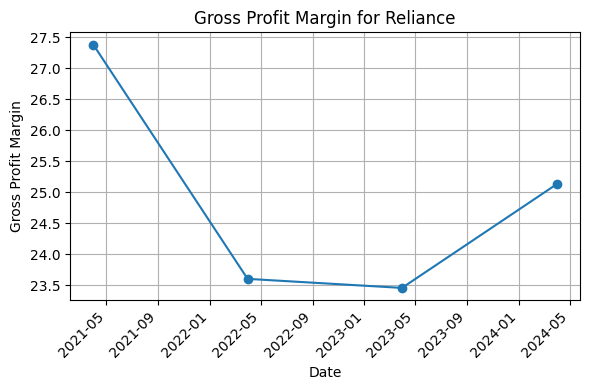

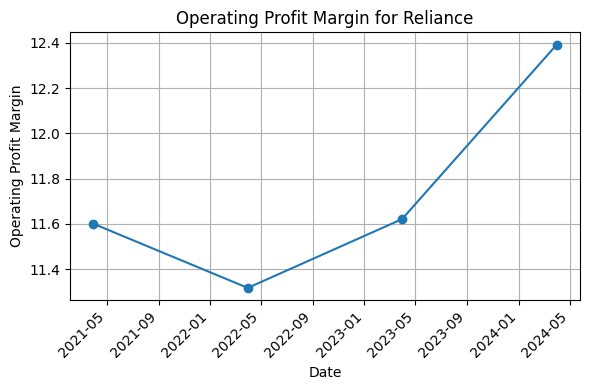

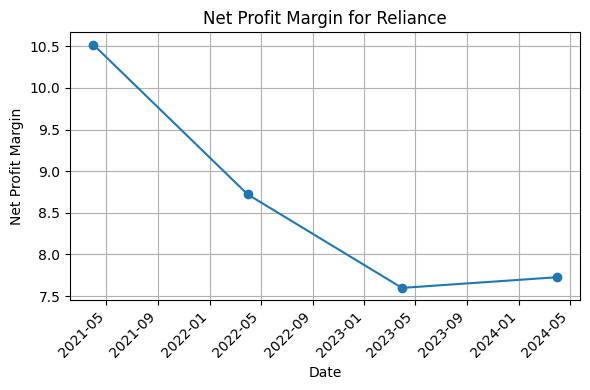

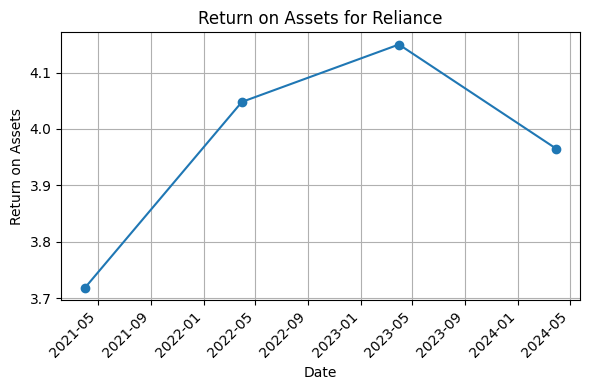

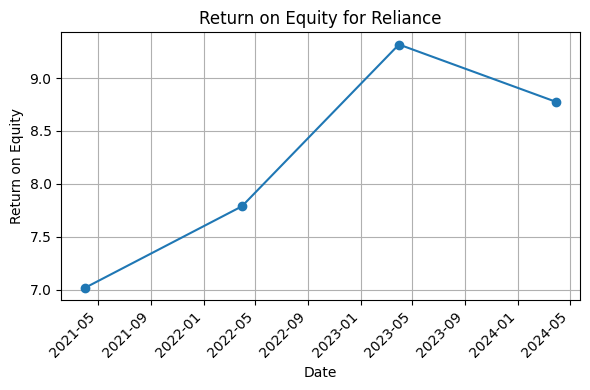

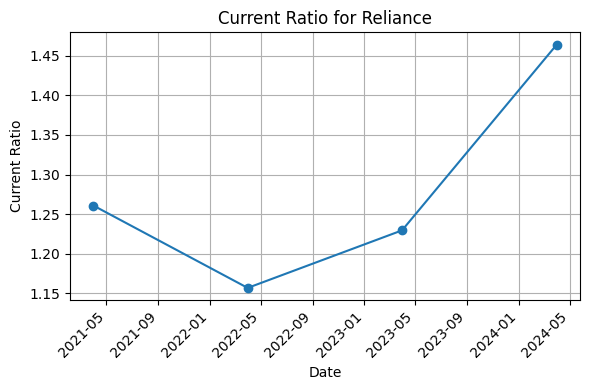

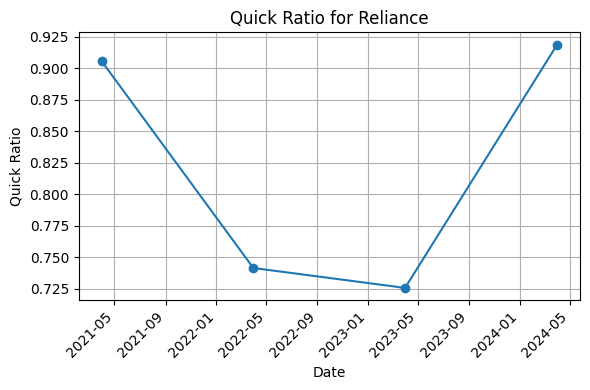

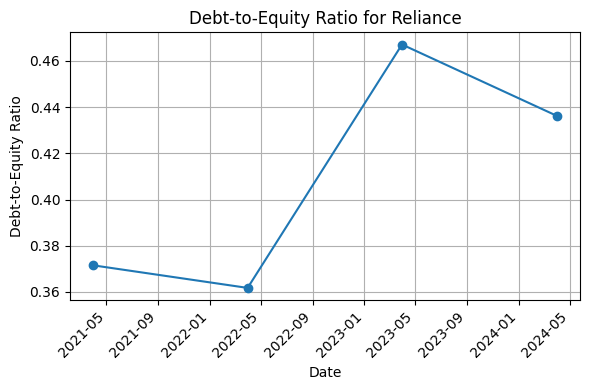

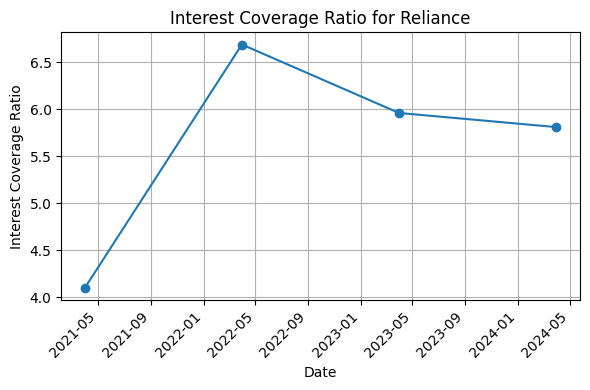

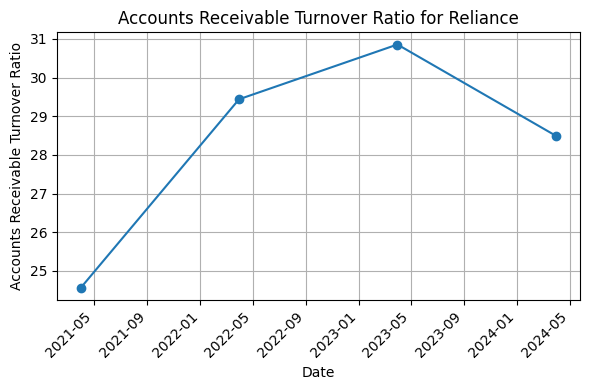

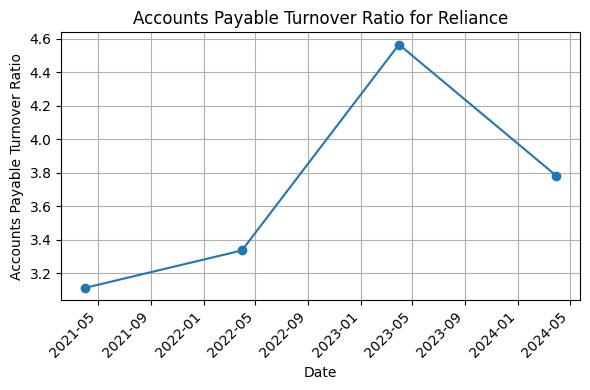

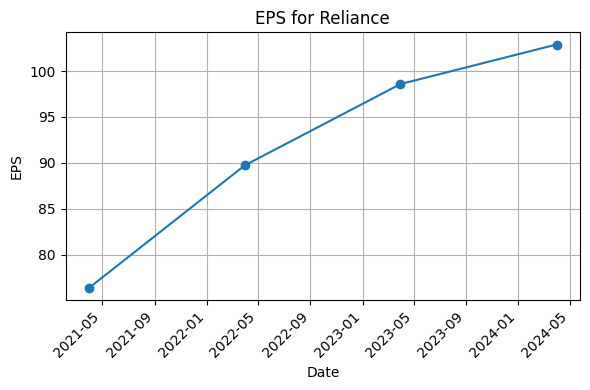

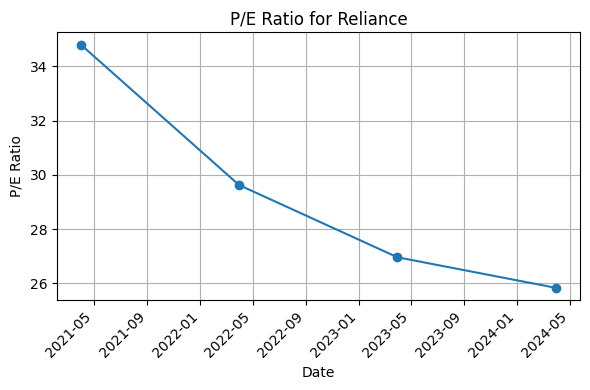

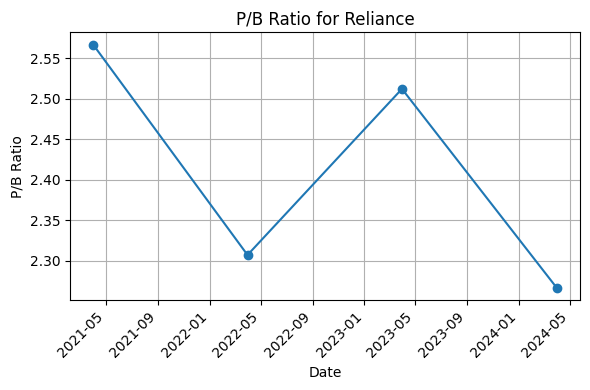

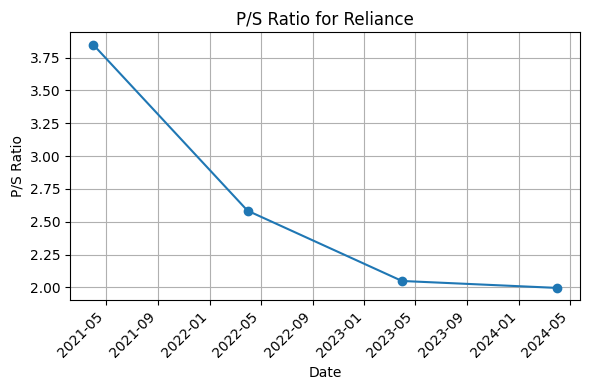

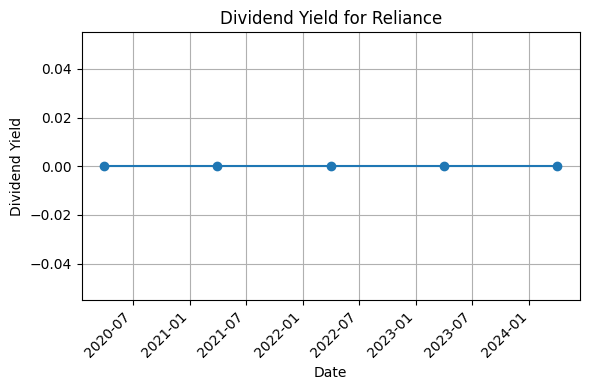

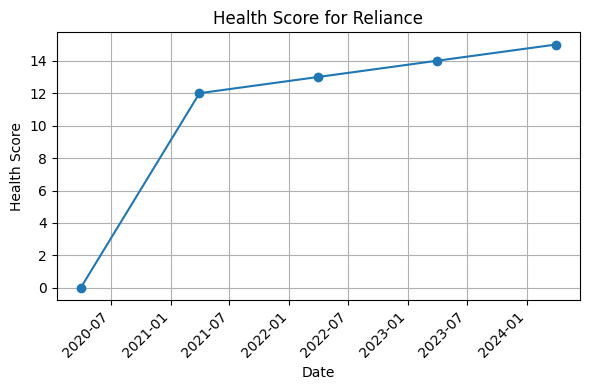

In [47]:
#plot reliance each ratios
import matplotlib.pyplot as plt

# Filter data for Reliance
reliance_data = restructured_ratios_df[restructured_ratios_df['Company'] == 'Reliance']

# Plotting each ratio
for ratio in reliance_data.columns[2:]:
    plt.figure(figsize=(6, 4))
    plt.plot(reliance_data['Date'], reliance_data[ratio], marker='o', linestyle='-')
    plt.title(f'{ratio} for Reliance')
    plt.xlabel('Date')
    plt.ylabel(ratio)
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


# Quarterly Financial Data

In [48]:
import yfinance as yf
import pandas as pd

# List of selected companies
companies = {
    'Reliance': 'RELIANCE.NS',
    'ITC': 'ITC.NS',
    'Suzlon Energy': 'SUZLON.NS',
    'Zomato': 'ZOMATO.NS',
    'Ksolves India': 'KSOLVES.NS'
}

# Dictionary to store the financial data for each company
financial_data = {}

# Fetch financial data for each company
for company_name, ticker in companies.items():
    stock = yf.Ticker(ticker)
    financial_data[company_name] = {
        'income_statement': stock.quarterly_financials.T,  # Use quarterly_financials
        'balance_sheet': stock.quarterly_balance_sheet.T,  # Use quarterly_balance_sheet
        'cashflow_statement': stock.quarterly_cashflow.T,  # Use quarterly_cashflow
        'market_price': stock.history(period='1d')['Close'][-1]  # Most recent market price
    }



C:\Users\DELL\AppData\Local\Temp\ipykernel_4120\2993205442.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'market_price': stock.history(period='1d')['Close'][-1]  # Most recent market price
C:\Users\DELL\AppData\Local\Temp\ipykernel_4120\2993205442.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'market_price': stock.history(period='1d')['Close'][-1]  # Most recent market price
C:\Users\DELL\AppData\Local\Temp\ipykernel_4120\2993205442.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

In [49]:
# Create a DataFrame to store all calculated ratios
columns = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
           'Current Ratio', 'Quick Ratio', 'Debt-to-Equity Ratio', 'Interest Coverage Ratio',
           'Inventory Turnover Ratio', 'Accounts Receivable Turnover Ratio', 'Accounts Payable Turnover Ratio',
           'EPS', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio', 'Dividend Yield', 'Beta']

all_ratios_data = []

for company_name, data in financial_data.items():
    income_statement = data['income_statement']
    balance_sheet = data['balance_sheet']
    cashflow_statement = data['cashflow_statement']
    market_price = data['market_price']

    # Get the common dates between income_statement, balance_sheet and cashflow_statement
    common_dates = income_statement.index.intersection(balance_sheet.index).intersection(cashflow_statement.index)

    # Iterate through the common dates
    for date in common_dates:
        # Check if cashflow_statement is empty before accessing it
        if cashflow_statement.empty:
            dividend_per_share = 0  # Set to 0 if cashflow_statement is empty
        else:
            # Use .get() with a default value to handle missing 'Dividend Per Share'
            dividend_per_share = cashflow_statement.loc[date].get('Dividend Per Share', 0)

        ratio_data = {
            'Company': company_name,
            'Date': date,
            'Gross Profit Margin': calculate_gross_profit_margin(income_statement.loc[date]),
            'Operating Profit Margin': calculate_operating_profit_margin(income_statement.loc[date]),
            'Net Profit Margin': calculate_net_profit_margin(income_statement.loc[date]),
            'Return on Assets': calculate_roa(income_statement.loc[date], balance_sheet.loc[date]),
            'Return on Equity': calculate_roe(income_statement.loc[date], balance_sheet.loc[date]),
            'Current Ratio': calculate_current_ratio(balance_sheet.loc[date]),
            'Quick Ratio': calculate_quick_ratio(balance_sheet.loc[date]),
            'Debt-to-Equity Ratio': calculate_debt_to_equity_ratio(balance_sheet.loc[date]),
            'Interest Coverage Ratio': calculate_interest_coverage_ratio(income_statement.loc[date]),
            'Accounts Receivable Turnover Ratio': calculate_accounts_receivable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'Accounts Payable Turnover Ratio': calculate_accounts_payable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'EPS': calculate_eps(income_statement.loc[date]),
            'P/E Ratio': calculate_pe_ratio(market_price, calculate_eps(income_statement.loc[date])),
            'P/B Ratio': calculate_pb_ratio(market_price, balance_sheet=balance_sheet.loc[date]),
            'P/S Ratio': calculate_ps_ratio(market_price, income_statement.loc[date], balance_sheet.loc[date]),
            'Dividend Yield': calculate_dividend_yield(dividend_per_share, market_price),  # Use dividend_per_share here
        }
        all_ratios_data.append(ratio_data)

# Create the final DataFrame
restructured_ratios_df = pd.DataFrame(all_ratios_data)  # Call the DataFrame constructor to create the DataFrame

# Display the DataFrame
restructured_ratios_df

,Company,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Interest Coverage Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio,Dividend Yield
0,Zomato,2023-09-30,76.33427,-6.144663,1.264045,0.162837,0.182352,6.136237,6.053753,0.026390,2.3125,5.058615,0.85533,0.04,6318.75,10.815985,74.975129,0.0
1,Zomato,2023-06-30,NaN,NaN,NaN,NaN,NaN,5.732919,5.652174,0.025047,NaN,NaN,NaN,NaN,NaN,10.829831,NaN,0.0


In [50]:
import yfinance as yf
import pandas as pd

# Create a DataFrame to store all calculated ratios (excluding cash flow-dependent ratios)
columns = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
           'Current Ratio', 'Quick Ratio', 'Debt-to-Equity Ratio', 'Interest Coverage Ratio',
           'Inventory Turnover Ratio', 'Accounts Receivable Turnover Ratio', 'Accounts Payable Turnover Ratio',
           'EPS', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio']

all_ratios_data = []

for company_name, data in financial_data.items():
    income_statement = data['income_statement']
    balance_sheet = data['balance_sheet']
    market_price = data['market_price']  # No need for cashflow_statement

    # Get the common dates between income_statement and balance_sheet
    common_dates = income_statement.index.intersection(balance_sheet.index)

    # Iterate through the common dates
    for date in common_dates:
        ratio_data = {
            'Company': company_name,
            'Date': date,
            'Gross Profit Margin': calculate_gross_profit_margin(income_statement.loc[date]),
            'Operating Profit Margin': calculate_operating_profit_margin(income_statement.loc[date]),
            'Net Profit Margin': calculate_net_profit_margin(income_statement.loc[date]),
            'Return on Assets': calculate_roa(income_statement.loc[date], balance_sheet.loc[date]),
            'Return on Equity': calculate_roe(income_statement.loc[date], balance_sheet.loc[date]),
            'Current Ratio': calculate_current_ratio(balance_sheet.loc[date]),
            'Quick Ratio': calculate_quick_ratio(balance_sheet.loc[date]),
            'Debt-to-Equity Ratio': calculate_debt_to_equity_ratio(balance_sheet.loc[date]),
            'Accounts Receivable Turnover Ratio': calculate_accounts_receivable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'Accounts Payable Turnover Ratio': calculate_accounts_payable_turnover_ratio(income_statement.loc[date], balance_sheet.loc[date]),
            'EPS': calculate_eps(income_statement.loc[date]),
            'P/E Ratio': calculate_pe_ratio(market_price, calculate_eps(income_statement.loc[date])),
            'P/B Ratio': calculate_pb_ratio(market_price, balance_sheet=balance_sheet.loc[date]),
            'P/S Ratio': calculate_ps_ratio(market_price, income_statement.loc[date], balance_sheet.loc[date]),
        }
        all_ratios_data.append(ratio_data)

# Create the final DataFrame
restructured_ratios_df = pd.DataFrame(all_ratios_data)

# Display the DataFrame
restructured_ratios_df.head()

,Company,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,EPS,P/E Ratio,P/B Ratio,P/S Ratio
0,Reliance,2024-09-30,28.398730,11.306282,7.153562,0.912500,2.021226,1.276340,0.842740,0.436297,7.686830,0.944218,NaN,NaN,2.194745,7.767682
1,Reliance,2024-03-31,13.138124,12.350074,8.011990,1.079223,2.388337,1.464052,0.919009,0.436232,7.478595,1.151813,NaN,NaN,2.266509,7.603302
2,Reliance,2023-09-30,28.717559,12.240066,7.501100,1.033994,2.315427,1.534985,1.021817,0.421576,6.278049,1.045496,25.71,103.383897,2.394003,7.755655
3,Reliance,2023-03-31,NaN,NaN,NaN,NaN,NaN,1.229559,0.725867,0.467111,NaN,NaN,NaN,NaN,2.512220,NaN
4,ITC,2024-03-31,60.376550,34.585856,28.819577,5.576352,6.872576,4.161987,2.658936,0.004073,4.413414,1.467359,NaN,NaN,8.053983,33.773711


In [51]:
# Iterate through restructured_ratios_df and score each ratio
scored_ratios = []
for index, row in restructured_ratios_df.iterrows():
    scores = {
        'Company': row['Company'],
        'Date': row['Date'],
        'Gross Profit Margin': score_gross_profit_margin(row['Gross Profit Margin']),
        'Operating Profit Margin': score_operating_profit_margin(row['Operating Profit Margin']),
        'Net Profit Margin': score_net_profit_margin(row['Net Profit Margin']),
        'Return on Assets': score_return_on_assets(row['Return on Assets']),
        'Return on Equity': score_return_on_equity(row['Return on Equity']),
        'Current Ratio': score_current_ratio(row['Current Ratio']),
        'Quick Ratio': score_quick_ratio(row['Quick Ratio']),
        'Debt-to-Equity Ratio': score_debt_to_equity(row['Debt-to-Equity Ratio']),
        'Accounts Receivable Turnover Ratio': score_accounts_receivable_turnover_ratio(row['Accounts Receivable Turnover Ratio']),
        'Accounts Payable Turnover Ratio': score_accounts_payable_turnover_ratio(row['Accounts Payable Turnover Ratio']),
        'P/E Ratio': score_pe_ratio(row['P/E Ratio']),
        'P/B Ratio': score_pb_ratio(row['P/B Ratio']),
        'P/S Ratio': score_ps_ratio(row['P/S Ratio']),
    }
    scored_ratios.append(scores)

# Convert scored_ratios list to a DataFrame
scored_ratios_df = pd.DataFrame(scored_ratios)

# Display the scored DataFrame
scored_ratios_df

,Company,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets,Return on Equity,Current Ratio,Quick Ratio,Debt-to-Equity Ratio,Accounts Receivable Turnover Ratio,Accounts Payable Turnover Ratio,P/E Ratio,P/B Ratio,P/S Ratio
0,Reliance,2024-09-30,0,1,1,0,0,1,1,2,2,0,0,1,0
1,Reliance,2024-03-31,0,1,1,0,0,1,1,2,2,0,0,1,0
2,Reliance,2023-09-30,0,1,1,0,0,1,2,2,1,0,0,1,0
3,Reliance,2023-03-31,0,0,0,0,0,1,1,2,0,0,0,1,0
4,ITC,2024-03-31,2,2,2,1,0,2,2,2,1,0,0,0,0
5,ITC,2023-09-30,2,2,2,1,0,2,2,2,1,0,0,0,0
6,Suzlon Energy,2024-06-30,1,1,1,0,0,0,0,2,0,0,0,0,0
7,Suzlon Energy,2024-03-31,1,1,1,0,0,2,2,2,0,0,0,0,0
8,Suzlon Energy,2023-09-30,1,1,1,0,0,2,2,2,0,0,0,0,0
9,Suzlon Energy,2023-03-31,0,0,0,0,0,2,2,0,0,0,0,0,0


In [52]:
# First, sum the scores across all the financial ratios for each company and date
scored_ratios_df['Total Health Score'] = scored_ratios_df[
    ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin', 'Return on Assets', 'Return on Equity',
     'Current Ratio', 'Quick Ratio', 'Debt-to-Equity Ratio', 'Accounts Receivable Turnover Ratio',
     'Accounts Payable Turnover Ratio', 'P/E Ratio', 'P/B Ratio', 'P/S Ratio']
].sum(axis=1)

# Sort the DataFrame by Total Health Score, Company, and Date in descending order
sorted_health_scores_df = scored_ratios_df.sort_values(by=['Total Health Score', 'Company', 'Date'], ascending=[False, True, True])

# Display the sorted DataFrame
sorted_health_scores_df[['Company', 'Date', 'Total Health Score']]


,Company,Date,Total Health Score
15,Ksolves India,2024-03-31,18
5,ITC,2023-09-30,14
4,ITC,2024-03-31,14
16,Ksolves India,2023-09-30,14
14,Ksolves India,2024-09-30,14
2,Reliance,2023-09-30,9
1,Reliance,2024-03-31,9
0,Reliance,2024-09-30,9
8,Suzlon Energy,2023-09-30,9
7,Suzlon Energy,2024-03-31,9
